# Intalación e Importación de Librerías

## Instalación

In [ ]:
! pip install ISLP
! pip install sweetviz
! pip install numpy
! pip install keplergl
! pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 41.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922315 sha256=b8f30d79b19246b256540534992eb1d229708e2ad2dc4dbe47dc4b93f453e9fb
  Stored in directory: /root/.cache/pip/wheels/e5/e9/db/b8b8f2fcb5cb1cd7268d88959fce267bc00697cb8f50dcd0d9
Successfully built keplergl


## Importación

In [ ]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from google.colab import files
import io
from google.colab import drive
# from keplergl import KeplerGl
from folium.plugins import HeatMap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Importación de Datos

In [ ]:
# Nos permite conectarnos a Google Drive (Hacerlo en caso de que los datos estén cargados en Google Drive)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos la base de datos a Google Collab
file_path = '/content/drive/MyDrive/Homicidios - Detenidos/Homicidios.xlsx'
Homicidios = pd.read_excel(file_path)

In [ ]:
Homicidios.head(5)

,Tipo Muert.,Zona,Subzona,Distrito,Circuito,Cod. Subcircu,Subcircuito,provincia,código de provincia,cantón,...,Med. Edad,Sexo,Género,Etnia,Estado Civil,Nacionalidad,Discapacidad,Prof Reg Civ,Instrucción,Antecedentes
0,ASESINATO,ZONA 9,D.M. QUITO,ELOY ALFARO,SOLANDA,17D06C06S04,SOLANDA 4,PICHINCHA,17,QUITO,...,A,HOMBRE,MASCULINO,MESTIZO/A,NO DETERMINADO,OTROS,NINGUNA,SIN_DATO,SIN_DATO,NaN
1,ASESINATO,ZONA 5,LOS RIOS,PUEBLOVIEJO,RICAURTE,12D02C05S01,RICAURTE 1,LOS RIOS,12,URDANETA,...,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO,NO
2,HOMICIDIO,ZONA 5,LOS RIOS,QUEVEDO,GALO PLAZA,12D03C05S01,GALO PLAZA 1,LOS RIOS,12,QUEVEDO,...,A,MUJER,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,COMERCIANTE,SIN_DATO,NO
3,HOMICIDIO,ZONA 9,D.M. QUITO,ELOY ALFARO,MENA,17D06C08S02,MENA 2,PICHINCHA,17,QUITO,...,A,HOMBRE,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,EMPLEADO,SIN_DATO,NO
4,ASESINATO,ZONA 5,GUAYAS,NARANJITO MARCELINO MARIDUEÑA,NARANJITO SUR,09D18C02S01,NARANJITO SUR 1,GUAYAS,9,NARANJITO,...,A,MUJER,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO,NO


# EDA Inicial

Utilizamos la librería SWEETVIZ la cual nos permite observar de manera general las estadísticas descriptivas de todas las variables.

In [ ]:
homi = sv.analyze(Homicidios)
homi.show_html('homi.html')

# Limpieza

In [ ]:
missing_values_Homicidios = Homicidios.isnull().sum()
print(missing_values_Homicidios)

Tipo Muert.                0
Zona                       0
Subzona                    0
Distrito                   0
Circuito                   0
Cod. Subcircu              0
Subcircuito                0
provincia                  0
código de provincia        0
cantón                     0
código de cantón          13
Coord. Y                   0
Coord. X                   0
Coord. Y Rev               0
Coord. X Rev               0
Area del Hecho             0
Lugar                      0
Tipo Lugar                 0
Fecha Infracción           0
Hora Infracción            0
Arma                       0
Tipo Arma                  0
Presun. Motiva.            0
Presun. Motiva. Obser      0
Probable Causa M.          0
Edad                       0
Med. Edad                  0
Sexo                       0
Género                     0
Etnia                      0
Estado Civil               0
Nacionalidad               0
Discapacidad               0
Prof Reg Civ               7
Instrucción   

Tenemos una base de datos sólida sin gran cantidad de missing values.

# Gráficos

## Instrucción

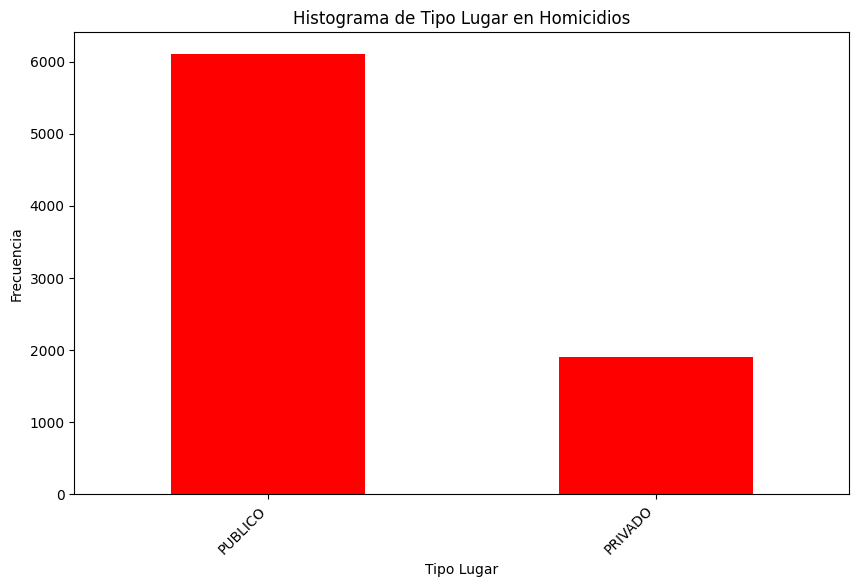

In [ ]:
# Visualizar un histograma de la variable "Lugar de Homicidios"
plt.figure(figsize=(10, 6))
Homicidios['Tipo Lugar'].value_counts().plot(kind='bar', color='red')
plt.title('Histograma de Tipo Lugar en Homicidios')
plt.xlabel('Tipo Lugar')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')

# Mostrar el histograma
plt.show()

Se puede observar que la mayor cantidad de Homicidios se cometió en lugares públicos, entendiendo Público como calles, parques, reservas naturales, etc. Mientras que privado pertenece a Urbanizaciones, Casas, Oficinas, Restaurantes.

In [ ]:
# Visualizar la frecuencia de instrucción de las víctimas

fig = px.histogram(Homicidios, x='Instrucción', color_discrete_sequence=['red'])

# Personaliza el título y las etiquetas
fig.update_layout(
    title='Histograma de Instrucción en Homicidios',
    xaxis_title='Instrucción',
    yaxis_title='Frecuencia'
)

# Ajusta la rotación de las etiquetas de x
fig.update_xaxes(tickangle=45)

# Muestra el histograma
fig.show()

Lamentablemente en la variabe instrución encontramos que la mayoría de los datos vienen con datos se encuentran en la categoría sin datos. Entonces no es una variable que podamos tener en cuenta para el análisis.

## Género

In [ ]:
# Crea un histograma utilizando la variable "Instrucción"
fig = px.histogram(Homicidios, x='Sexo', color_discrete_sequence=['red'])

# Personaliza el título y las etiquetas
fig.update_layout(
    title='Histograma de Instrucción en Homicidios',
    xaxis_title='Sexo',
    yaxis_title='Frecuencia'
)

# Ajusta la rotación de las etiquetas de x
fig.update_xaxes(tickangle=45)

# Muestra el histograma
fig.show()

Podemos observar una clara predominancia en el género Hombre, siendo mas de 12  veces la cantidad de mujeres. Es decir 9 de cada 10 homicidios en el Ecuador son hacia hombres.

## Hora

In [ ]:
Homicidios['Hora Infracción'] = pd.to_datetime(Homicidios['Hora Infracción'], format='%H:%M:%S', errors='coerce')

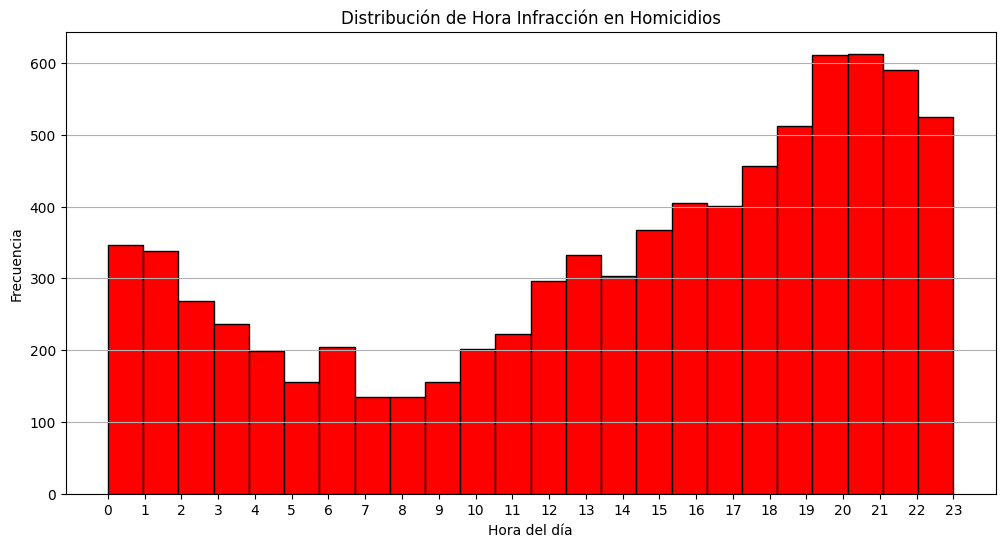

In [ ]:
# Convierte la columna "Hora Infracción" a un formato de tiempo
Homicidios['Hora Infracción'] = pd.to_datetime(Homicidios['Hora Infracción'], format='%H:%M:%S', errors='coerce')

# Crea un histograma de la variable "Hora Infracción"
plt.figure(figsize=(12, 6))
Homicidios['Hora Infracción'].dt.hour.plot(kind='hist', bins=24, color='red', edgecolor='black')
plt.title('Distribución de Hora Infracción en Homicidios')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(range(24))
plt.grid(axis='y')

# Muestra el histograma
plt.show()

Este gráfico representa la frecuencia de homicidios en las distintas horas del día. Se puede observar que a las 8pm y 9pm es la hora en la que más se registra homicidios, con una freciencia de más de 600.

In [ ]:
# Crear una nueva columna que clasifique las horas en claridad y oscuridad
def classify_time_of_day(hour):
    if 6 <= hour < 18:  # De 6 AM a 6 PM es claridad
        return 'Claridad'
    else:  # De 6 PM a 6 AM es oscuridad
        return 'Oscuridad'

Homicidios['Tiempo del día'] = Homicidios['Hora Infracción'].dt.hour.apply(classify_time_of_day)


## Tiempo del Día

In [ ]:
fig = px.histogram(Homicidios, x='Tiempo del día', color_discrete_sequence=['red'])

# Personaliza el título y las etiquetas
fig.update_layout(
    title='Histograma de Tiempo del Día',
    xaxis_title='Tiempo del día',
    yaxis_title='Frecuencia'
)

# Ajusta la rotación de las etiquetas de x
fig.update_xaxes(tickangle=45)

# Muestra el histograma
fig.show()

En este gráfico tenemos dos grupos: claridad, quiere decir cuando aun existe presencia de luz, nosotros asignamos que se agrupe las horas de 6am a 6pm, y el grupo oscuridad de 6pm a 6am.
Existe una diferencia grande en la frecuecia de ambos grupos, los homicidios pasan más en las horas agrupadas a oscuridad.
Cabe recalcar que se puede hacer "zoom" a este gráfico, es decir si colocamos el mouse encima de alguna de las barras de frecuencia, nos va a dar el dato exacto.

## Edad

In [ ]:
fig = px.histogram(Homicidios, x='Edad', color_discrete_sequence=['red'])

# Personaliza el título y las etiquetas
fig.update_layout(
    title='Histograma de Edad',
    xaxis_title='Edad',
    yaxis_title='Frecuencia'
)

# Ajusta la rotación de las etiquetas de x
fig.update_xaxes(tickangle=45)

# Muestra el histograma
fig.show()

En la variable Edad podemos encontrar varios resultados importantes.
1. Existieron 262 abortos ilegales que fueron penalizados por la ley.
2. Existieron 457 personas de 30 años victimas de homicidio.

De igual manera, este gráfico esta diseñado para poder interactuar en él, si se mantiene el mouse encima de alguna barra, aparecerá la información completa de la misma.

In [ ]:
## Crear una nueva variable para poder dividir nuestra data en grupos de edad

intervalos_edad = [0, 18, 30, 45, 60, 100]

# Define los nombres de los grupos de edad para cada intervalo
nombres_grupos_edad = ['Menor de 18', '18-30', '31-45', '46-60', 'Más de 60']

# Utiliza la función 'cut' de pandas para crear la nueva columna de grupos de edad
Homicidios['Grupo de Edad'] = pd.cut(Homicidios['Edad'], bins=intervalos_edad, labels=nombres_grupos_edad, right=False)

# Verifica los primeros registros del DataFrame para ver la nueva columna de grupos de edad
print(Homicidios[['Edad', 'Grupo de Edad']].head())

   Edad Grupo de Edad
0    45         46-60
1    25         18-30
2    38         31-45
3    33         31-45
4    25         18-30


In [ ]:
Homicidios.head()

,Tipo Muert.,Zona,Subzona,Distrito,Circuito,Cod. Subcircu,Subcircuito,provincia,código de provincia,cantón,...,Género,Etnia,Estado Civil,Nacionalidad,Discapacidad,Prof Reg Civ,Instrucción,Antecedentes,Tiempo del día,Grupo de Edad
0,ASESINATO,ZONA 9,D.M. QUITO,ELOY ALFARO,SOLANDA,17D06C06S04,SOLANDA 4,PICHINCHA,17,QUITO,...,MASCULINO,MESTIZO/A,NO DETERMINADO,OTROS,NINGUNA,SIN_DATO,SIN_DATO,NaN,Oscuridad,46-60
1,ASESINATO,ZONA 5,LOS RIOS,PUEBLOVIEJO,RICAURTE,12D02C05S01,RICAURTE 1,LOS RIOS,12,URDANETA,...,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO,NO,Oscuridad,18-30
2,HOMICIDIO,ZONA 5,LOS RIOS,QUEVEDO,GALO PLAZA,12D03C05S01,GALO PLAZA 1,LOS RIOS,12,QUEVEDO,...,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,COMERCIANTE,SIN_DATO,NO,Claridad,31-45
3,HOMICIDIO,ZONA 9,D.M. QUITO,ELOY ALFARO,MENA,17D06C08S02,MENA 2,PICHINCHA,17,QUITO,...,MASCULINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,EMPLEADO,SIN_DATO,NO,Oscuridad,31-45
4,ASESINATO,ZONA 5,GUAYAS,NARANJITO MARCELINO MARIDUEÑA,NARANJITO SUR,09D18C02S01,NARANJITO SUR 1,GUAYAS,9,NARANJITO,...,FEMENINO,MESTIZO/A,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO,NO,Claridad,18-30


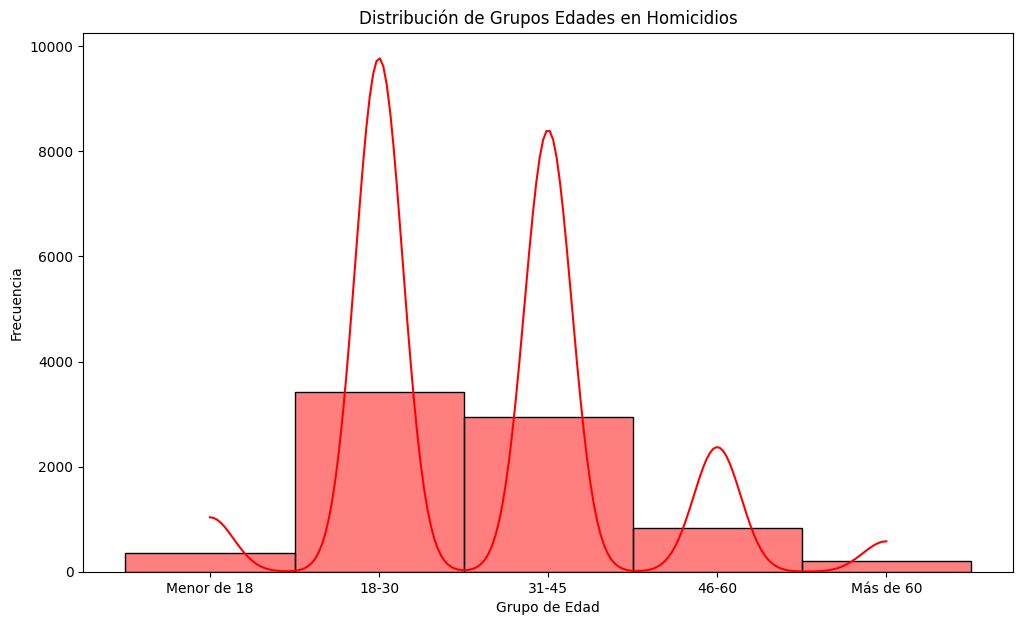

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(Homicidios['Grupo de Edad'].dropna(), bins=30, kde=True, color='red')
plt.title('Distribución de Grupos Edades en Homicidios')
plt.xlabel('Grupo de Edad')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

Se ha creado diferentes grupos de edad para mostrar la frecuencia de homicidios de cada grupo. El grupo de 18 a 30 años es el que más freciencia de homicidios presenta, seguido del grupo de 31 a 45 años.


In [ ]:
import plotly.express as px

# Crea un gráfico de barras agrupado o apilado utilizando las columnas 'Grupo de Edad' y 'Tiempo del día'
fig = px.histogram(
    Homicidios,
    x='Tiempo del día',
    color='Grupo de Edad',
    barmode='group',  # Cambia 'group' a 'stack' si prefieres un histograma apilado
    color_discrete_sequence=px.colors.qualitative.Plotly  # Personaliza la paleta de colores según tus preferencias
)

# Personaliza el gráfico
fig.update_layout(
    title='Distribución de Grupos de Edad por Tiempo del Día',
    xaxis_title='Tiempo del Día',
    yaxis_title='Frecuencia'
)

# Muestra el gráfico
fig.show()

Lo que se explicó en los gráficos anteriores se junta para formar un solo gráfico con ambos datos, el intervalo de la hora del homicidio y la edad de la victima.
El grupo de oscuridad es el que abarca más homicidios, en especial al grupo de 18 a 30 años de edad, cuenta con 2130 victimas.
Ambos grupos de oscuridad y claridad tienen el mismo orden de freciencia con respecto a los grupos de edad.

De igual manera, este gráfico es interactivo.

## Grupo de Edad y Hora del Día

In [ ]:
import plotly.express as px
import pandas as pd

# Asegúrate de haber convertido la columna 'Hora Infracción' a un formato de tiempo, si aún no lo has hecho.
Homicidios['Hora Infracción'] = pd.to_datetime(Homicidios['Hora Infracción'], format='%H:%M:%S', errors='coerce')

# Extrae solo la parte de la hora de 'Hora Infracción'
Homicidios['Hora'] = Homicidios['Hora Infracción'].dt.hour

# Agrupa los datos por hora y grupo de edad
agrupado = Homicidios.groupby(['Hora', 'Grupo de Edad']).size().unstack(fill_value=0)

# Crea un gráfico de áreas apiladas utilizando plotly.express
fig = px.area(
    agrupado.reset_index(),
    x='Hora',
    y=agrupado.columns.tolist(),
    labels={'Hora': 'Hora del Día', 'value': 'Frecuencia'},
    title='Distribución de Grupos de Edad por Hora de Infracción',
    color_discrete_sequence=px.colors.qualitative.Plotly  # Personaliza los colores
)

# Personaliza la leyenda para mejorar la claridad
fig.update_layout(
    xaxis=dict(tickmode='linear', tick0=0, dtick=1),  # Configura el eje x para mostrar todas las horas del día
    yaxis_title='Frecuencia',
    legend_title='Grupo de Edad'
)

# Muestra el gráfico
fig.show()


Este gráfico de áreas apiladas, es más especifico dado que se encuenra la hora del homicidio, igual dividido por gruos de edad. Se puede observar como cambia la frecuencia de los homicidios dada la hora. Podemos observar una baja a las 7am y un alta a las 8pm, y el grupo más grande de las victimas es el 18 a 30 años.

Se puede interactuar con el gráfico.

# Información Geográfica

## Provincias

In [ ]:
# Carga de datos Población provincia

file_path5 = '/content/drive/MyDrive/Homicidios - Detenidos/pobla_provincias.xlsx'
poblacion_provincias = pd.read_excel(file_path5)

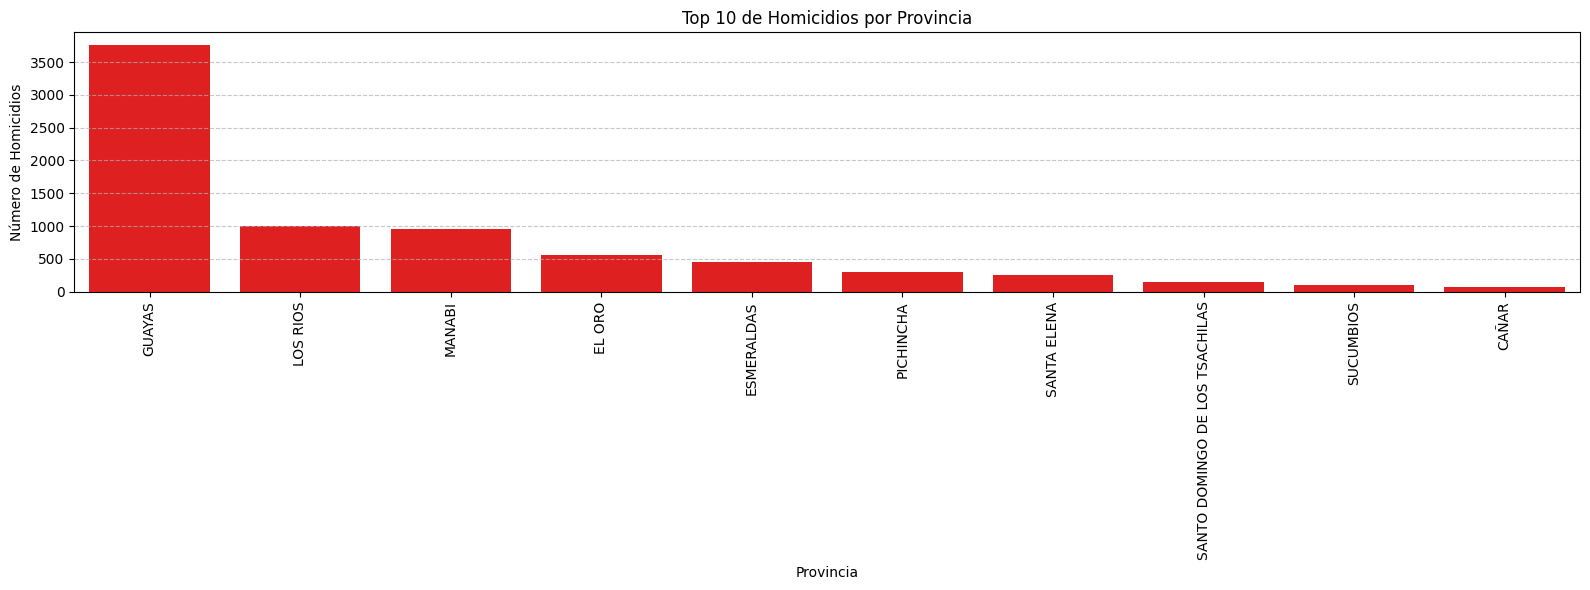

In [ ]:
homicidios_por_provincia = Homicidios['provincia'].value_counts()

# Selecciona solo el top 10 de las provincias con mayor número de homicidios
top_10_homicidios = homicidios_por_provincia.nlargest(10)

# Grafica el histograma del conteo de homicidios por provincia
plt.figure(figsize=(16, 6))
sns.barplot(x=top_10_homicidios.index, y=top_10_homicidios.values, color='red')
plt.title('Top 10 de Homicidios por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se realizó un top 10 de las provincias más peligrosas del país, siendo la número 1 Guayas con más de 3500 homicidios en un año. Es superior el numeró de homicidios en contraste con el segundo y 3 puesto, dado que solo presentan 1000 victimas al año.

In [ ]:
# Calcula el número total de homicidios por provincia
homicidios_por_provincia = Homicidios['provincia'].value_counts()

# Selecciona solo el top 10 de las provincias con mayor número de homicidios
top_10_homicidios = homicidios_por_provincia.nlargest(10)

# Fusiona los DataFrames Homicidios y poblacion_provincia en función de la variable 'provincia'
merged_df = pd.merge(Homicidios, poblacion_provincias, on='provincia')


In [ ]:
# Agrupa los dato, y cuenta el número de homicidios en cada grupo
df_homicidios_por_provincia = Homicidios.groupby(['cantón', 'provincia']).size().reset_index(name='numero_homicidios')

df_completo = pd.merge(df_homicidios_por_provincia, poblacion_provincias[['provincia', 'poblacion']], on='provincia', how='left')

# Calcula el número de homicidios cada 100 mil habitantes por provincia
df_completo['homicidios_por_100k'] = (df_completo['numero_homicidios'] / df_completo['poblacion']) * 100000


<ipython-input-48-eaa3d27ceed5>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-48-eaa3d27ceed5>:6: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.



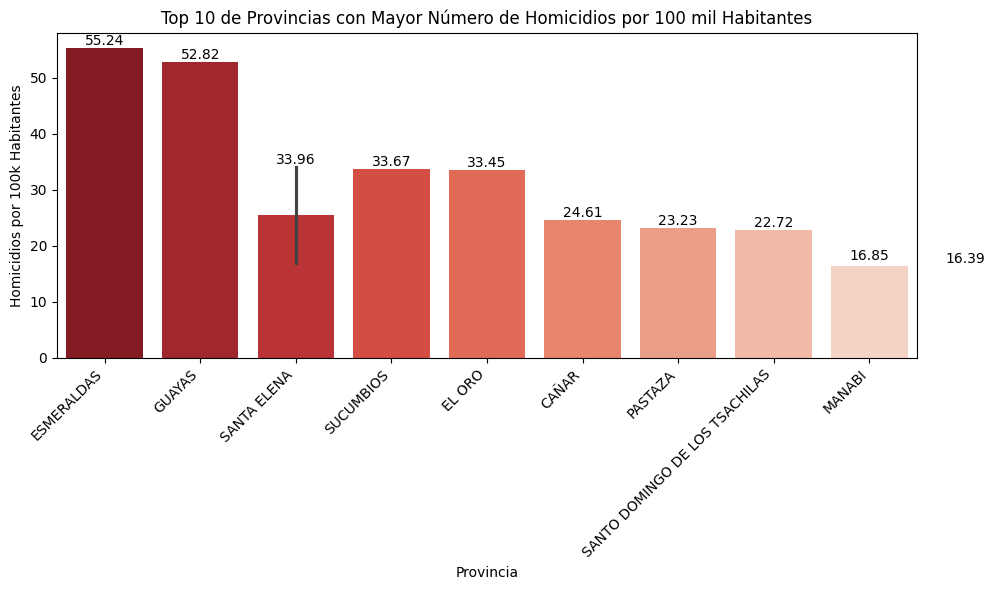

In [ ]:
top_10_provincias = df_completo.nlargest(10, 'homicidios_por_100k')

custom_palette = sns.color_palette("Reds_r", n_colors=10)
# Grafica el top 10 de las provincias con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='provincia', y='homicidios_por_100k', data=top_10_provincias, palette=custom_palette)
plt.title('Top 10 de Provincias con Mayor Número de Homicidios por 100 mil Habitantes')
plt.xlabel('Provincia')
plt.ylabel('Homicidios por 100k Habitantes')
plt.xticks(rotation=45, ha='right')

# Muestra los valores encima de las barras
for i, valor in enumerate(top_10_provincias['homicidios_por_100k']):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Por otro lado, si se hace el top 10 de las provincias con más numero de homicidios POR CADA 100 MIL HABITANTE, las cosas cambian. Esmeraldas se ubica en el puesto número 1, luego guayas y Santa Elena. El orden cambia debido a que cada provincia tiene un número distinto de habitantes.

In [ ]:
top_10_provincias = df_completo.nlargest(10, 'homicidios_por_100k')

# Crea un gráfico de barras utilizando plotly.express
fig = px.bar(
    top_10_provincias,
    x='provincia',
    y='homicidios_por_100k',
    color='homicidios_por_100k',
    color_continuous_scale='Reds',
    labels={'provincia': 'Provincia', 'homicidios_por_100k': 'Homicidios por 100k Habitantes'},
    title='Top 10 de Provincias con Mayor Número de Homicidios por 100 mil Habitantes',
    text=top_10_provincias['homicidios_por_100k'].round(2)  # Mostrar los valores en las barras
)

# Personaliza el gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Gira las etiquetas del eje x
    xaxis_title='Provincia',
    yaxis_title='Homicidios por 100k Habitantes'
)

# Muestra el gráfico
fig.show()

## Cantones

In [ ]:
# Carga de datos Población cantón

file_path4 = '/content/drive/MyDrive/Homicidios - Detenidos/pobl_ciuda.xlsx'
poblacion_ciudades = pd.read_excel(file_path4)

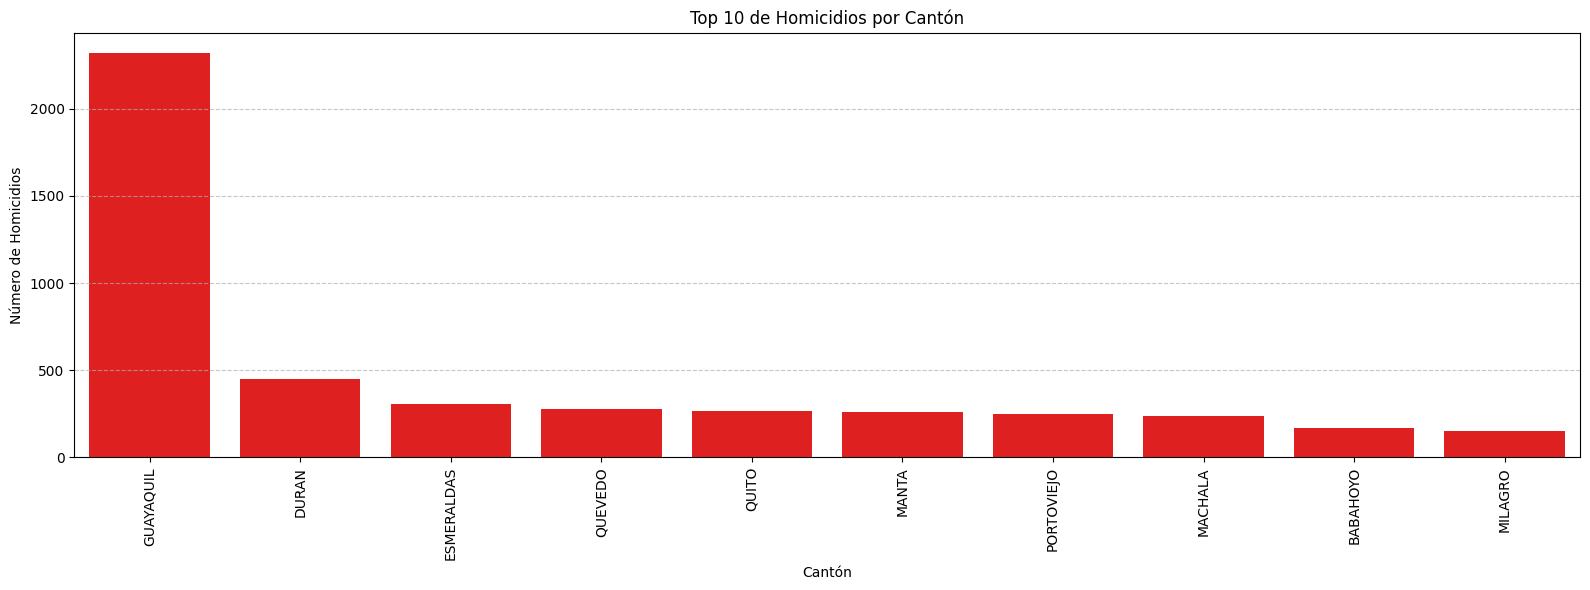

In [ ]:
homicidios_por_canton = Homicidios['cantón'].value_counts()

# Selecciona solo el top 10 de los cantones con mayor número de homicidios
top_10_homicidios = homicidios_por_canton.nlargest(10)

# Grafica el histograma del conteo de homicidios por cantón
plt.figure(figsize=(16, 6))
sns.barplot(x=top_10_homicidios.index, y=top_10_homicidios.values, color='red')
plt.title('Top 10 de Homicidios por Cantón')
plt.xlabel('Cantón')
plt.ylabel('Número de Homicidios')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En este gráfico se realiza el top 10 de los cantones con más número de homicidios en el año en Ecuador. En este caso, tenemos a Guayas en primer lugar con más de 2000 homicidios, le sigue Durán con menos de la cuarta parte, menos de 500 homiciios.

In [ ]:
# Calcula el número total de homicidios por cantón
homicidios_por_canton = Homicidios['cantón'].value_counts()

# Selecciona solo el top 10 de los cantones con mayor número de homicidios
top_10_homicidios = homicidios_por_canton.nlargest(10)

# Fusiona los DataFrames Homicidios y poblacion_ciudades en función de la variable 'cantón'
merged_df = pd.merge(Homicidios, poblacion_ciudades, on='cantón')

In [ ]:
# Agrupa los datos por cantón y provincia, y cuenta el número de homicidios en cada grupo
df_homicidios_por_canton_provincia = Homicidios.groupby(['cantón', 'provincia']).size().reset_index(name='numero_homicidios')
df_completo = pd.merge(df_homicidios_por_canton_provincia, poblacion_ciudades[['cantón', 'poblacion_proxy']], on='cantón', how='left')

In [ ]:
# Calcula el número de homicidios cada 100 mil habitantes por cantón
df_completo['homicidios_por_100k'] = (df_completo['numero_homicidios'] / df_completo['poblacion_proxy']) * 100000

<ipython-input-57-a6c71adb89a4>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




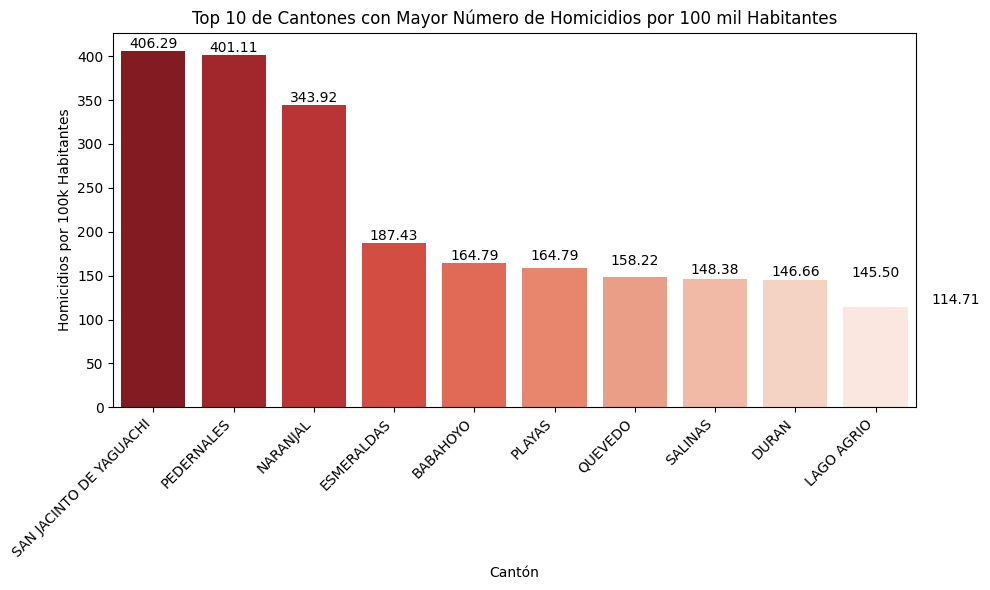

In [ ]:
top_10_cantones = df_completo.nlargest(11, 'homicidios_por_100k')

custom_palette = sns.color_palette("Reds_r", n_colors=10)
# Grafica el top 10 de los cantones con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cantón', y='homicidios_por_100k', data=top_10_cantones, palette=custom_palette)
plt.title('Top 10 de Cantones con Mayor Número de Homicidios por 100 mil Habitantes')
plt.xlabel('Cantón')
plt.ylabel('Homicidios por 100k Habitantes')
plt.xticks(rotation=45, ha='right')

# Muestra los valores encima de las barras
for i, valor in enumerate(top_10_cantones['homicidios_por_100k']):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Y por último, a cantones tambien se le hace el top 10 de número de homicidios por cada 100 mil habitantes. El primer lugar es para San Jacinto de Yaguachi, seguido de Pedernales y Naranjal. Los dos primeros puestos tiene un número bastantes similar de homicidios por cada 100 mil habitantes, de 406,29 y de 401,11.

In [ ]:
import plotly.express as px

# Selecciona los 11 cantones con la mayor tasa de homicidios por 100 mil habitantes
top_10_cantones = df_completo.nlargest(11, 'homicidios_por_100k')

fig = px.bar(
    top_10_cantones,
    x='cantón',
    y='homicidios_por_100k',
    color='homicidios_por_100k',
    color_continuous_scale='Reds',
    labels={'cantón': 'Cantón', 'homicidios_por_100k': 'Homicidios por 100k Habitantes'},
    title='Top 10 de Cantones con Mayor Número de Homicidios por 100 mil Habitantes',
    text=top_10_cantones['homicidios_por_100k'].round(2)  # Muestra los valores en las barras
)

# Personaliza el gráfico
fig.update_layout(
    xaxis_tickangle=-45,  # Gira las etiquetas del eje x para una mejor visualización
    xaxis_title='Cantón',
    yaxis_title='Homicidios por 100k Habitantes',
    plot_bgcolor='white'  # Fondo blanco para el gráfico
)

# Muestra el gráfico
fig.show()


# Mapa Geográfico

In [ ]:
Homicidios.rename(columns={'Coord. X Rev': 'Cordenada_X'}, inplace=True)
Homicidios.rename(columns={'Coord. Y Rev': 'Cordenada_Y'}, inplace=True)

## Markers

In [ ]:
import folium

# Crea un mapa centrado en Ecuador con OpenStreetMap como base
mapa_ecuador = folium.Map(location=[-1.8312, -78.1834], zoom_start=7, tiles='OpenStreetMap')

# Añade marcadores para cada acto violento en el DataFrame "Homicidios"
for index, row in Homicidios.iterrows():
    folium.Marker([row['Cordenada_Y'], row['Cordenada_X']], popup=row['Tipo Muert.']).add_to(mapa_ecuador)

# Guarda el mapa como un archivo HTML
mapa_ecuador.save("mapa_homicidios_openstreetmap.html")

## Mapa de calor

In [ ]:
import folium
from folium.plugins import HeatMap

# Crea un mapa centrado en Ecuador con OpenStreetMap como base
mapa_ecuador = folium.Map(location=[-1.8312, -78.1834], zoom_start=7, tiles='OpenStreetMap')

# Convierte las coordenadas de los homicidios a una lista de listas
coordenadas_homicidios = Homicidios[['Cordenada_Y', 'Cordenada_X']].values.tolist()

# Añade un mapa de calor con las coordenadas de los homicidios
HeatMap(coordenadas_homicidios).add_to(mapa_ecuador)

# Guarda el mapa como un archivo HTML
mapa_ecuador.save("mapa_calor_homicidios.html")

## Mapa de Clusters

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Crea un mapa centrado en Ecuador con OpenStreetMap como base
mapa_ecuador = folium.Map(location=[-1.8312, -78.1834], zoom_start=7, tiles='OpenStreetMap')

# Crea un clúster de marcadores
marcadores_cluster = MarkerCluster().add_to(mapa_ecuador)

# Añade marcadores individuales a los clústeres
for index, row in Homicidios.iterrows():
    folium.Marker([row['Cordenada_Y'], row['Cordenada_X']], popup=row['Tipo Muert.']).add_to(marcadores_cluster)

# Guarda el mapa como un archivo HTML
mapa_ecuador.save("mapa_clusters_homicidios.html")

# Clusterización

In [ ]:
!pip install pandas scikit-learn plotly

In [ ]:
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
Homicidios = pd.get_dummies(Homicidios, columns=['Sexo'])

In [ ]:
Homicidios['Antecedentes'] = Homicidios['Antecedentes'].map({'NO': 0, 'SÍ': 1})

In [ ]:
Homicidios = pd.get_dummies(Homicidios, columns=['Tiempo del día'], prefix='Tiempo_del_dia')


In [ ]:
Homicidios.head()

,Tipo Muert.,Zona,Subzona,Distrito,Circuito,Cod. Subcircu,Subcircuito,provincia,código de provincia,cantón,...,Estado Civil,Nacionalidad,Discapacidad,Prof Reg Civ,Instrucción,Antecedentes,Hora,Grupo de Edad,Tiempo_del_dia_Claridad,Tiempo_del_dia_Oscuridad
0,ASESINATO,ZONA 9,D.M. QUITO,ELOY ALFARO,SOLANDA,17D06C06S04,SOLANDA 4,PICHINCHA,17,QUITO,...,NO DETERMINADO,OTROS,NINGUNA,SIN_DATO,SIN_DATO,NaN,3,46-60,0,1
1,ASESINATO,ZONA 5,LOS RIOS,PUEBLOVIEJO,RICAURTE,12D02C05S01,RICAURTE 1,LOS RIOS,12,URDANETA,...,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO,NO,4,18-30,0,1
2,HOMICIDIO,ZONA 5,LOS RIOS,QUEVEDO,GALO PLAZA,12D03C05S01,GALO PLAZA 1,LOS RIOS,12,QUEVEDO,...,SOLTERO,ECUADOR,NINGUNA,COMERCIANTE,SIN_DATO,NO,9,31-45,1,0
3,HOMICIDIO,ZONA 9,D.M. QUITO,ELOY ALFARO,MENA,17D06C08S02,MENA 2,PICHINCHA,17,QUITO,...,SOLTERO,ECUADOR,NINGUNA,EMPLEADO,SIN_DATO,NO,5,31-45,0,1
4,ASESINATO,ZONA 5,GUAYAS,NARANJITO MARCELINO MARIDUEÑA,NARANJITO SUR,09D18C02S01,NARANJITO SUR 1,GUAYAS,9,NARANJITO,...,SOLTERO,ECUADOR,NINGUNA,ESTUDIANTE,SIN_DATO,NO,6,18-30,1,0


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Prepara los datos
data = Homicidios[['Edad', 'Sexo_HOMBRE', 'Sexo_MUJER', 'Tiempo_del_dia_Oscuridad']]

# Imputa valores faltantes utilizando la media de la columna
imputer = SimpleImputer(strategy='mean')  # Puedes ajustar la estrategia según sea necesario (e.g., 'median', 'most_frequent')
data_imputed = imputer.fit_transform(data)

# Escala los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Aplica el algoritmo K-Means
n_clusters = 2  # Ajusta el número de clústeres según tus necesidades
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Asigna las etiquetas de clúster a los datos
Homicidios['cluster'] = kmeans.labels_

# Crea un gráfico de dispersión 3D con plotly
fig = px.scatter_3d(
    Homicidios,
    x='Edad',
    y='Sexo_HOMBRE',
    z='Tiempo_del_dia_Oscuridad',
    color='cluster',
    title='Visualización 3D de los Clústeres',
    labels={'Edad': 'Edad', 'Sexo_HOMBRE': 'Sexo (HOMBRE)', 'Antecedentes': 'Antecedentes'},
    color_discrete_sequence=px.colors.qualitative.Plotly  # Ajusta los colores según tus preferencias
)

# Muestra el gráfico 3D
fig.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

